In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import (
    accuracy_score, classification_report,
    roc_auc_score,
    ConfusionMatrixDisplay, RocCurveDisplay
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv(r'C:\Users\hy\Documents\Cjkdjkustomer churn\Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print("Dataset shape:", df.shape)

Dataset shape: (7043, 21)


In [ ]:
list(df.columns.tolist())

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'churn']

In [36]:
# Checking out columns' (names,types,any missing value)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [37]:
df.duplicated().any()

np.False_

In [38]:
# checking missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
churn               0
dtype: int64

In [39]:
# lowercase column name
df.columns = map(str.lower, df.columns)
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [40]:
print(df['onlinebackup'].value_counts(),
    df['onlinesecurity'].value_counts(),
    df['deviceprotection'].value_counts(),
    df['techsupport'].value_counts(),
    df['streamingtv'].value_counts(),
    df['streamingmovies'].value_counts())

onlinebackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64 onlinesecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64 deviceprotection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64 techsupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64 streamingtv
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64 streamingmovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


In [41]:
#replace 'No internet service' to No for the following columns
replace_cols = [ 'onlinesecurity', 'onlinebackup', 'deviceprotection',
                'techsupport','streamingtv', 'streamingmovies']
for i in replace_cols : 
    df[i]  = df[i].replace({'No internet service' : 'No'})

In [42]:
print(df['onlinebackup'].value_counts(),
    df['onlinesecurity'].value_counts(),
    df['deviceprotection'].value_counts(),
    df['techsupport'].value_counts(),
    df['streamingtv'].value_counts(),
    df['streamingmovies'].value_counts())

onlinebackup
No     4614
Yes    2429
Name: count, dtype: int64 onlinesecurity
No     5024
Yes    2019
Name: count, dtype: int64 deviceprotection
No     4621
Yes    2422
Name: count, dtype: int64 techsupport
No     4999
Yes    2044
Name: count, dtype: int64 streamingtv
No     4336
Yes    2707
Name: count, dtype: int64 streamingmovies
No     4311
Yes    2732
Name: count, dtype: int64


In [43]:
# replacing values
df['seniorcitizen']=df['seniorcitizen'].replace({1:'Yes',0:"No"})
df['seniorcitizen'].value_counts()

seniorcitizen
No     5901
Yes    1142
Name: count, dtype: int64

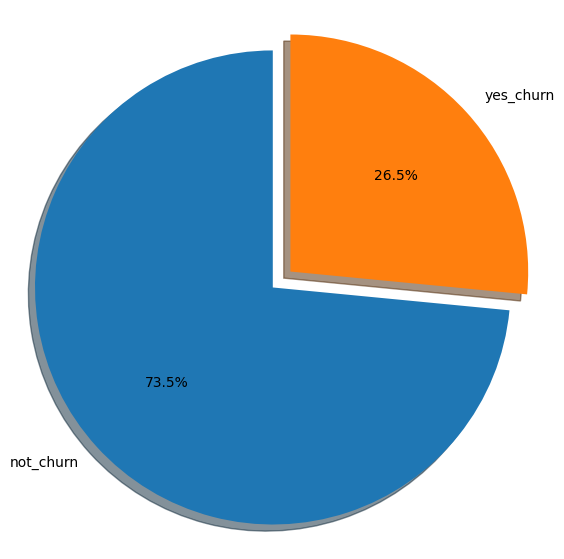

In [44]:
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.pie(df["churn"].value_counts(),labels=('not_churn','yes_churn'),explode = [0.1,0],autopct ='%1.1f%%' ,
        shadow = True,startangle = 90,labeldistance = 1.1)
plt.axis('equal')

plt.show()


In [45]:
import matplotlib.pyplot as plt

def plot_cat(df, feature, xlabel_rotation=0):
    fig, ax = plt.subplots(1, 2, figsize=(14, 4))

    # Split data
    non_churn = df[df['churn'] == 'No'][feature].value_counts()
    churn = df[df['churn'] == 'Yes'][feature].value_counts()

    # Non-churn plot
    if not non_churn.empty:
        non_churn.plot(kind='bar', ax=ax[0], rot=xlabel_rotation)
    ax[0].set_title('Non-churn Customers')
    ax[0].set_xlabel(feature)
    ax[0].set_ylabel('Number of Customers')

    # Churn plot
    if not churn.empty:
        churn.plot(kind='bar', ax=ax[1], rot=xlabel_rotation)
    ax[1].set_title('Churn Customers')
    ax[1].set_xlabel(feature)
    ax[1].set_ylabel('Number of Customers')

    fig.suptitle(f'{feature} distribution in customer attrition',
                 y=1.05, size=16, weight='bold')
    plt.tight_layout()
    plt.show()


In [46]:
# define features
categorical_features=['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']
numerical_features=['tenure','monthlycharges', 'totalcharges']

In [47]:
df['churn'].value_counts()

churn
No     5174
Yes    1869
Name: count, dtype: int64

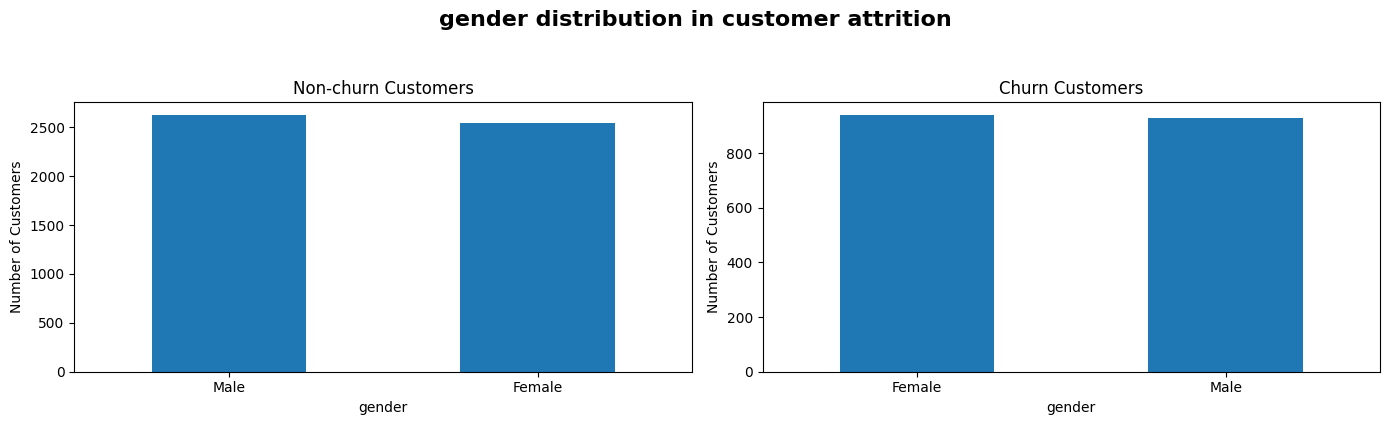

In [48]:
plot_cat(df,'gender')

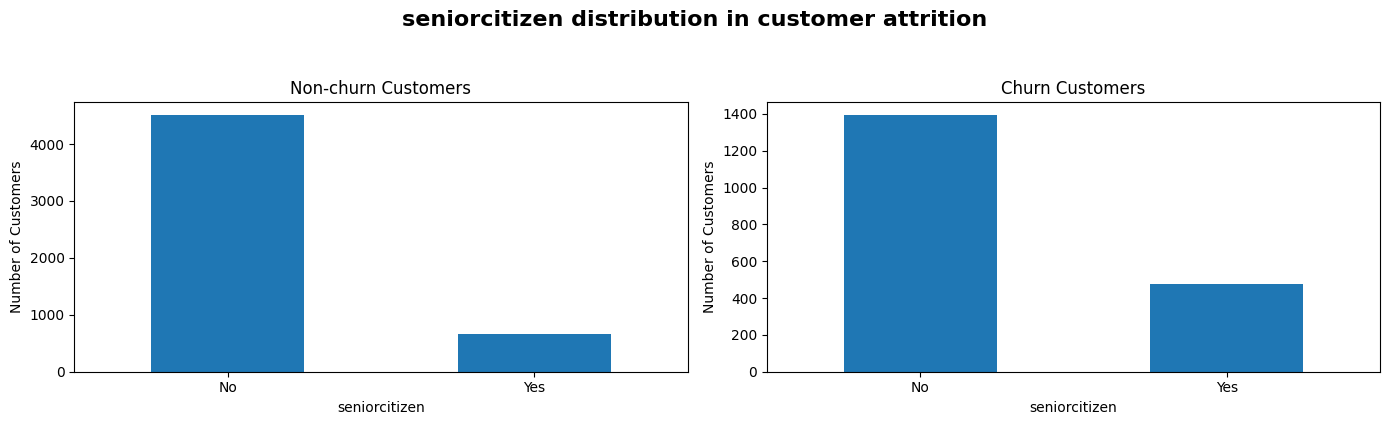

In [49]:
plot_cat(df,'seniorcitizen')

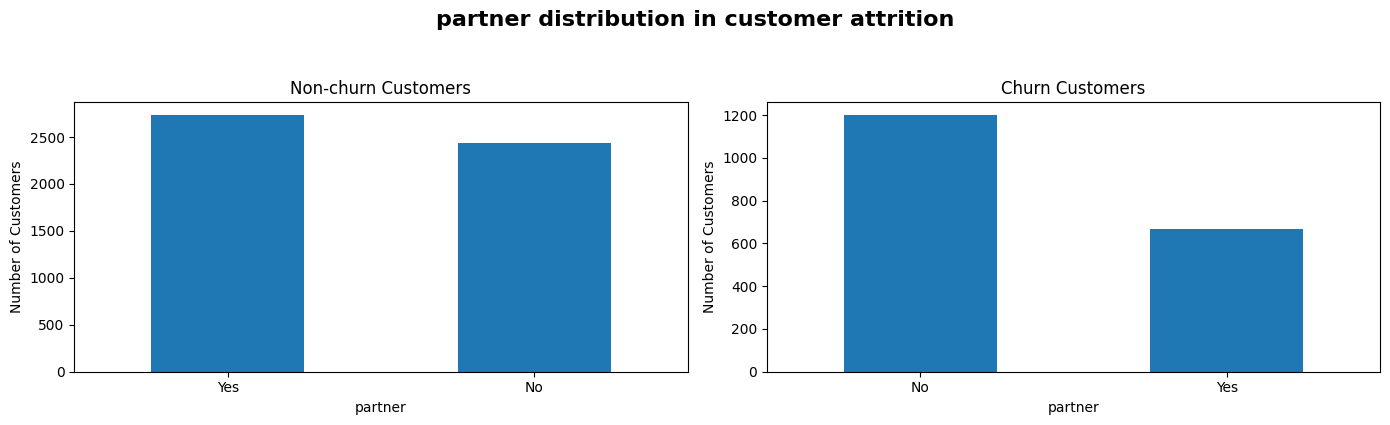

In [96]:
# partner 
plot_cat(df,'partner')


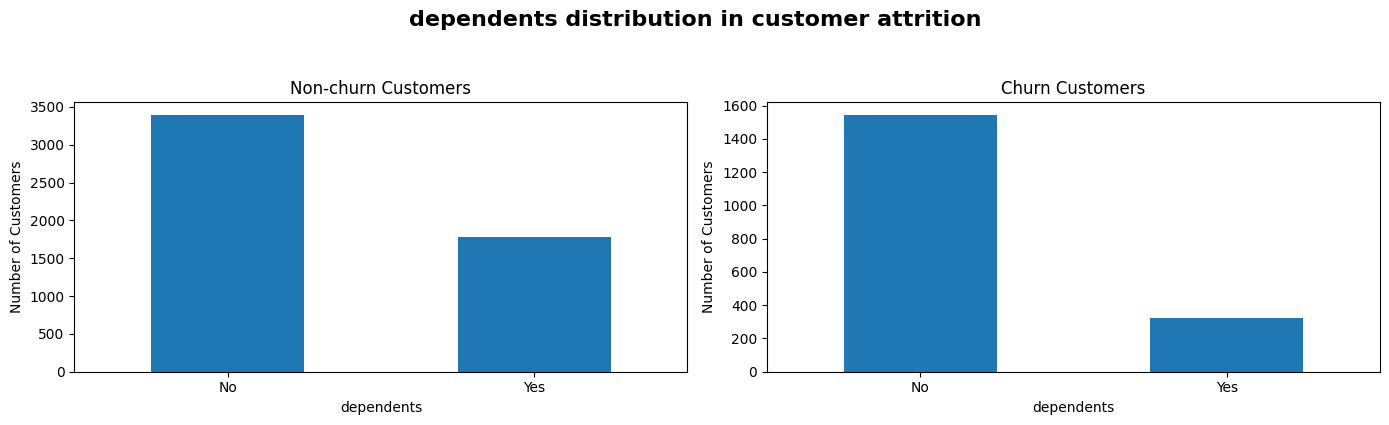

In [97]:
# dependents
plot_cat(df,'dependents')


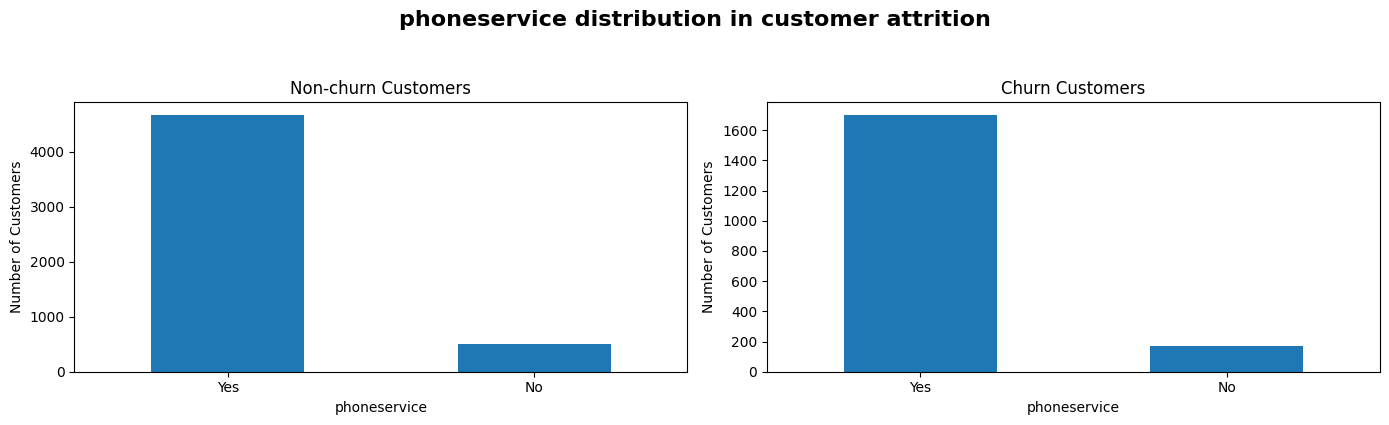

In [98]:
# phoneservice
plot_cat(df,'phoneservice')

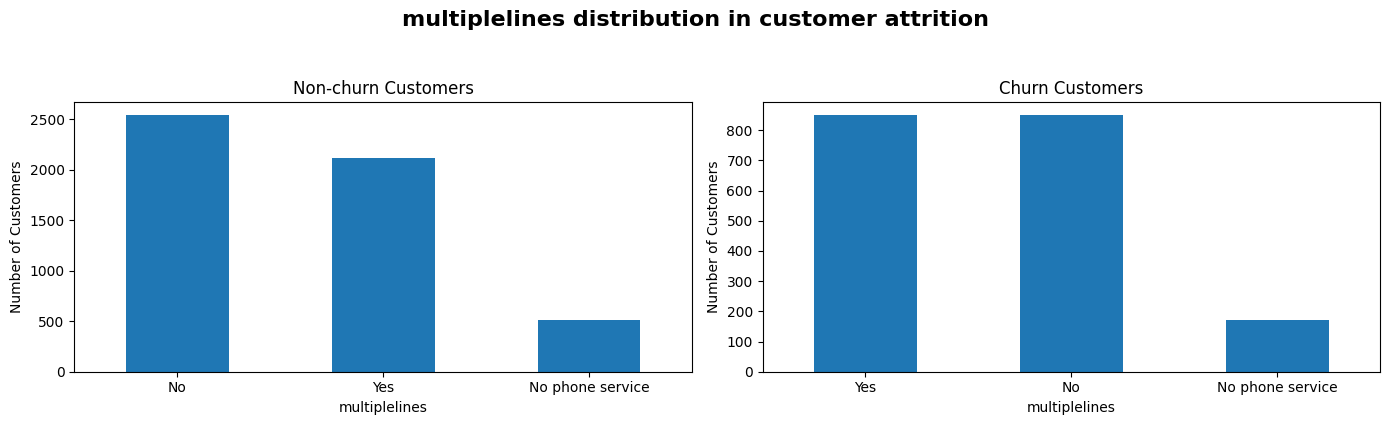

In [99]:
# multiplelines
plot_cat(df,'multiplelines')


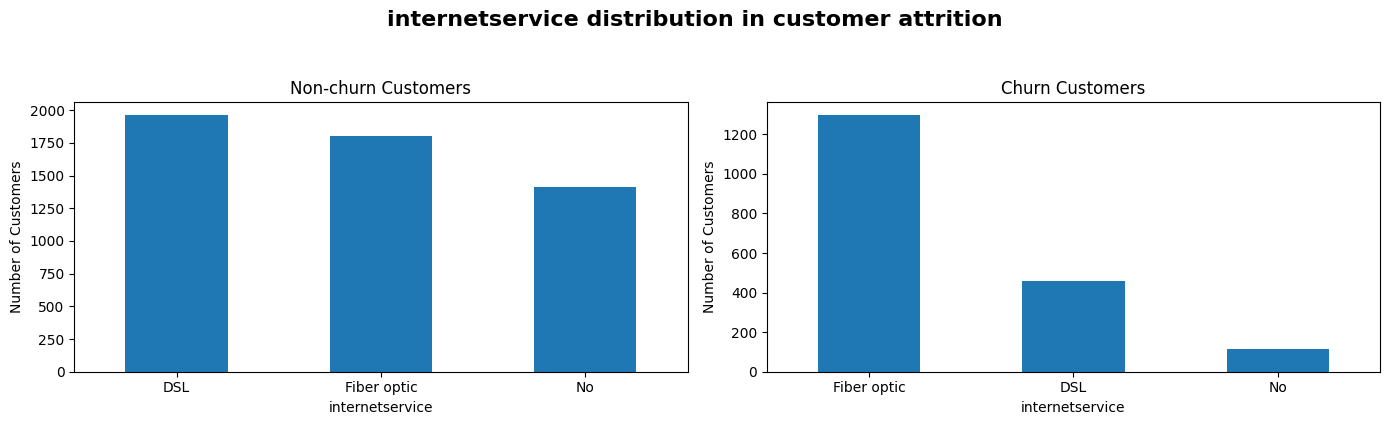

In [100]:
# internetservice
plot_cat(df,'internetservice')


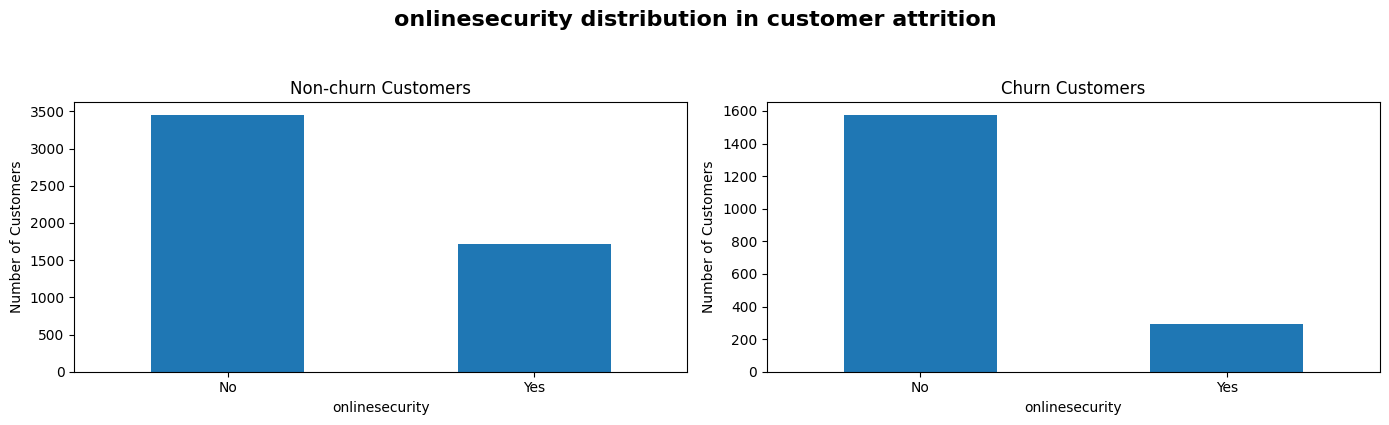

In [101]:
# plot_cat(df,'onlinesecurity')

plot_cat(df,'onlinesecurity')


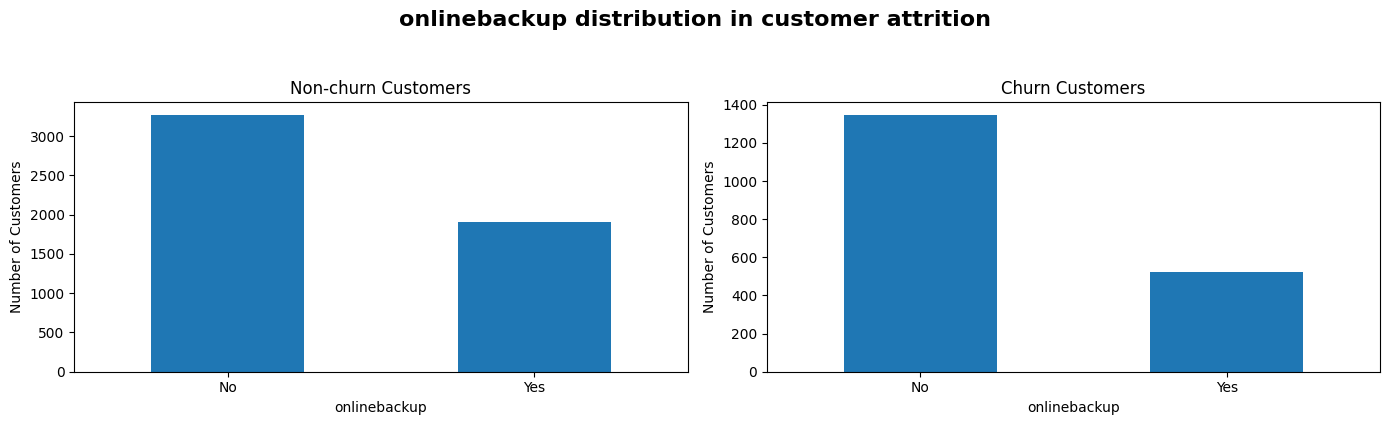

In [102]:
#onlinebackup
plot_cat(df,'onlinebackup')


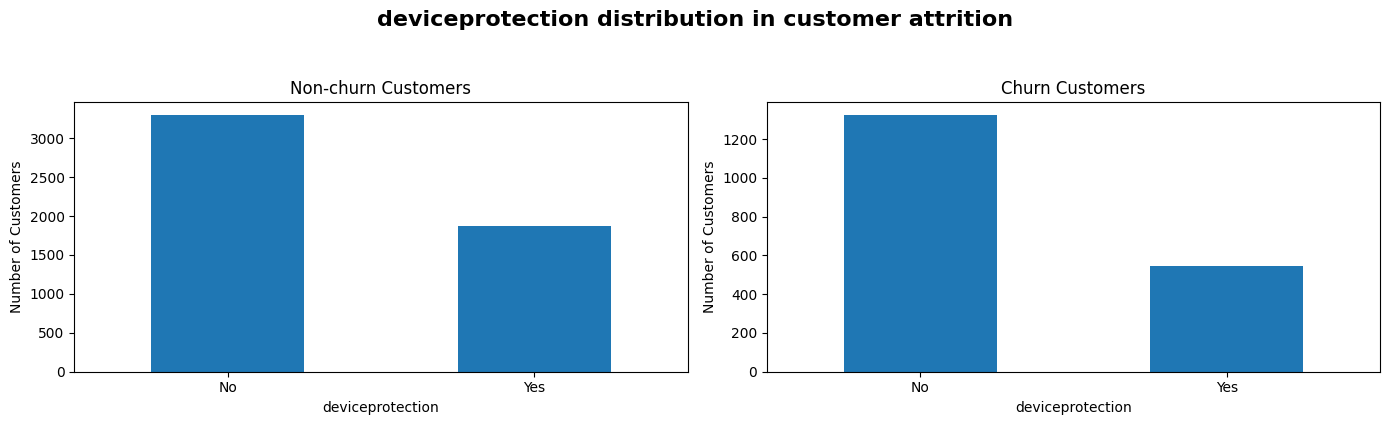

In [103]:
#deviceprotection
plot_cat(df,'deviceprotection')


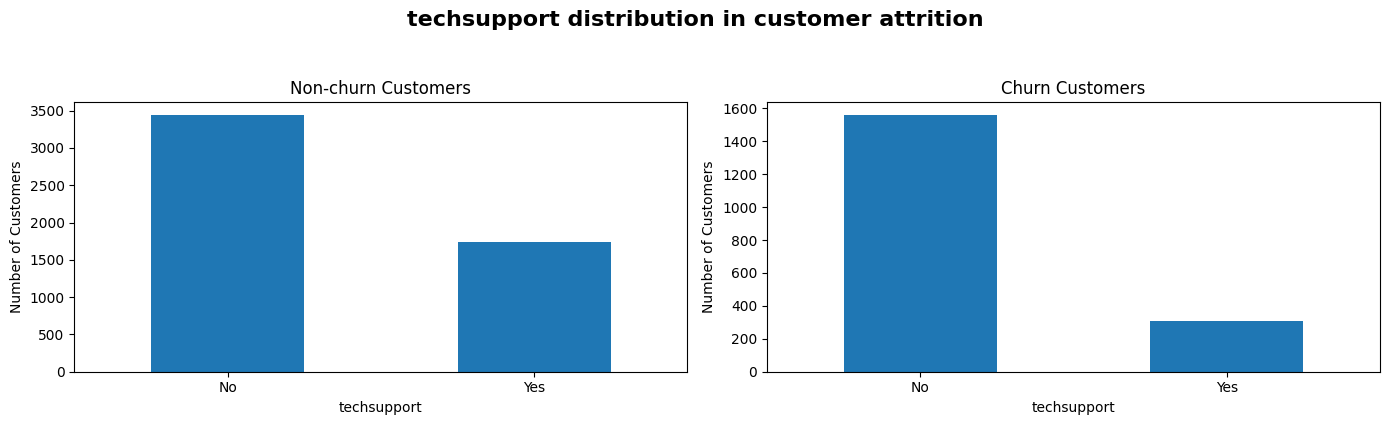

In [104]:
#techsupport
plot_cat(df,'techsupport')


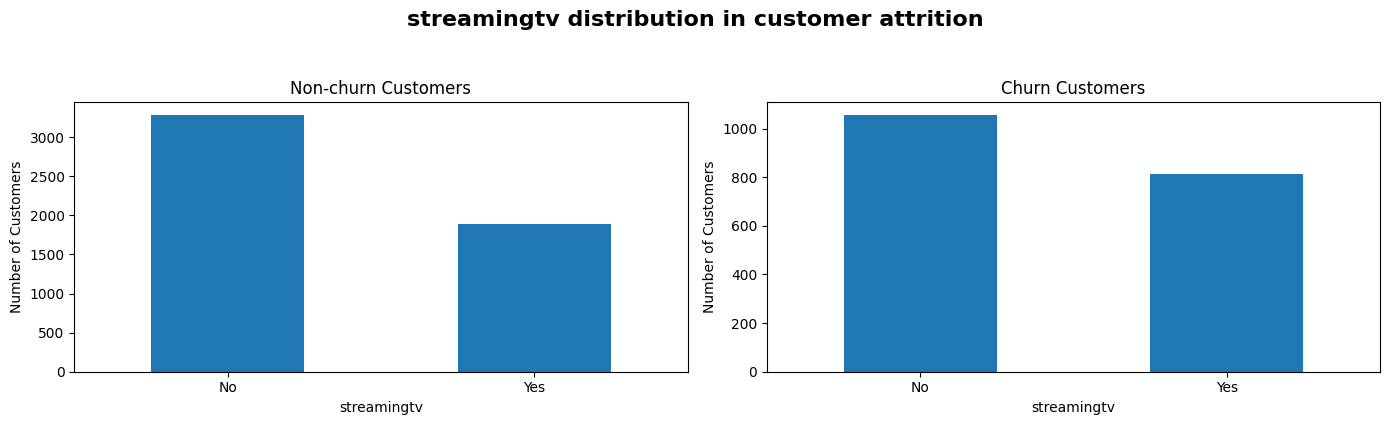

In [105]:
# streamingtv
plot_cat(df,'streamingtv')

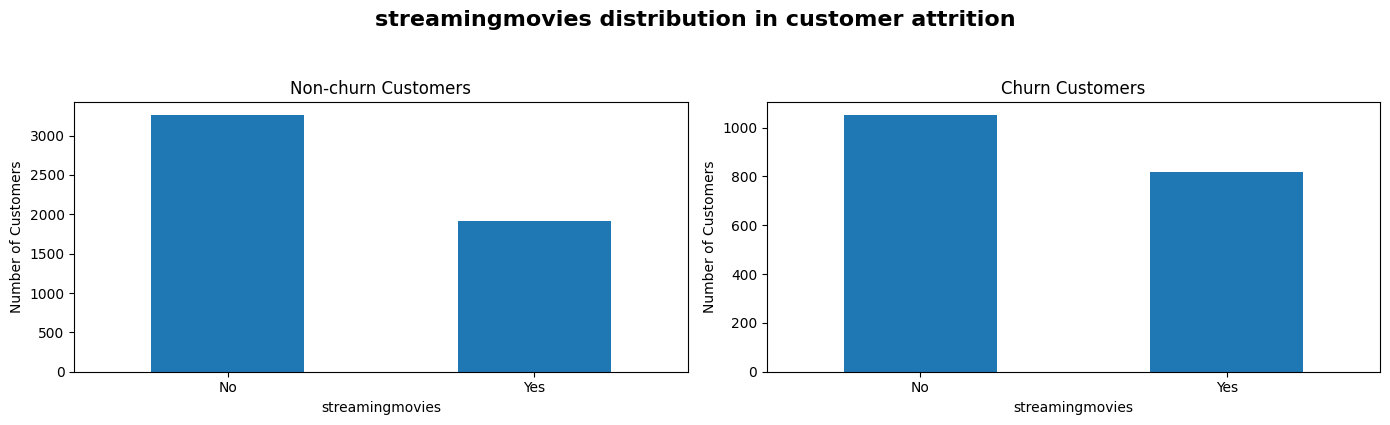

In [106]:
# streamingmovies
plot_cat(df,'streamingmovies')


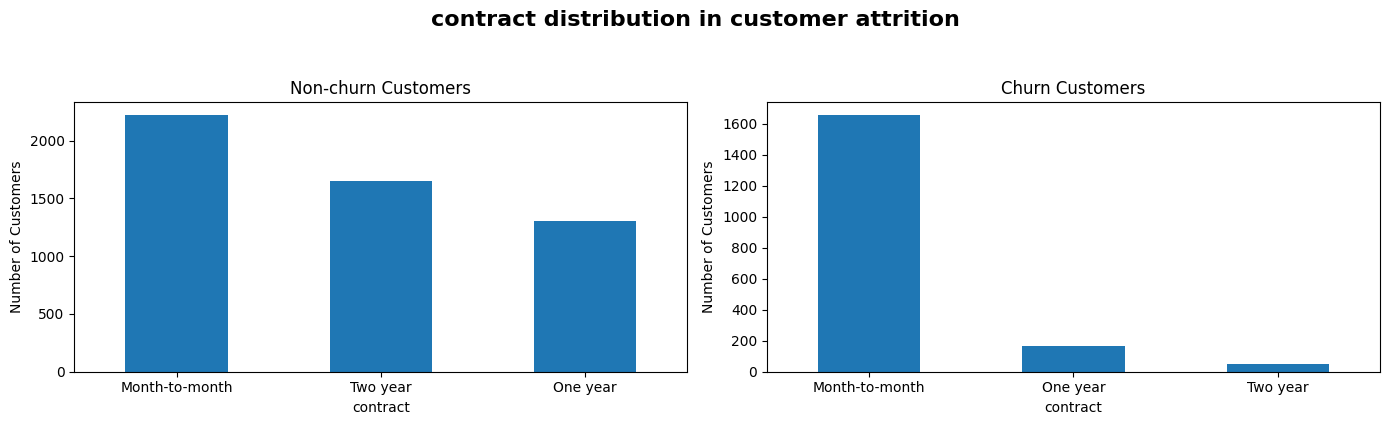

In [107]:
# contract
plot_cat(df,'contract')

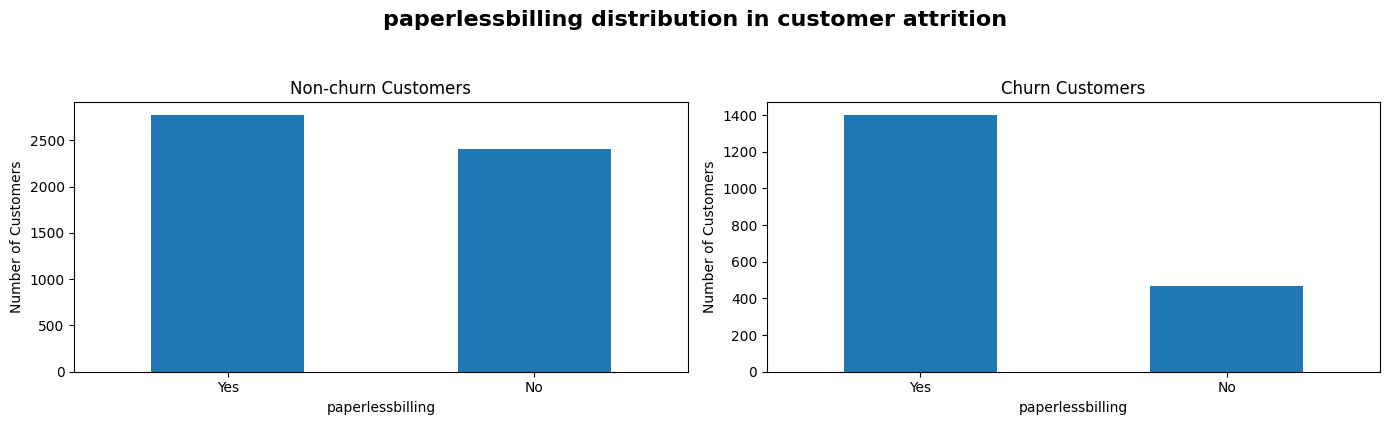

In [108]:
# paperlessbilling
plot_cat(df,'paperlessbilling')


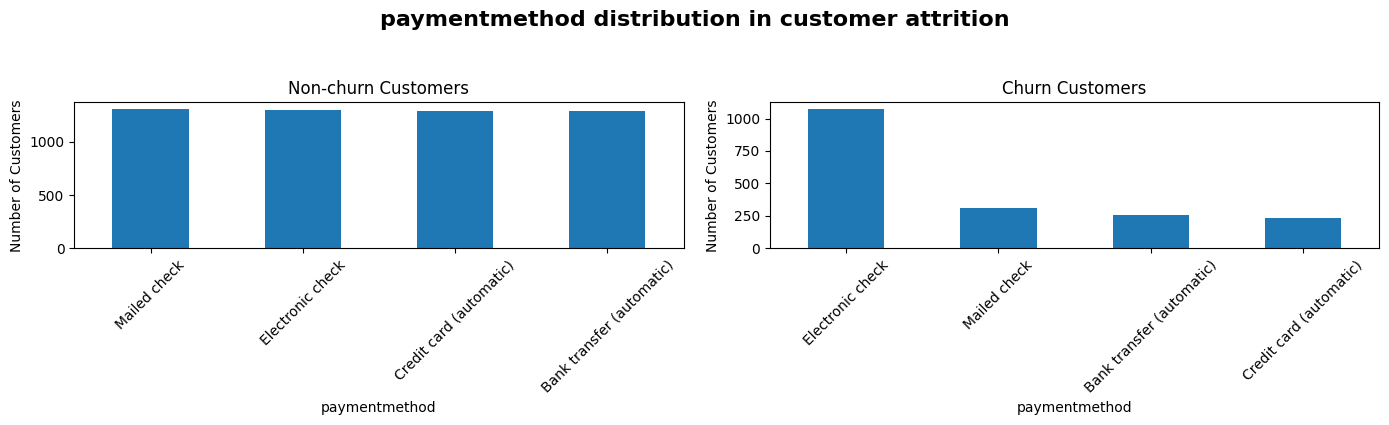

In [109]:
#paymentmethod
plot_cat(df,'paymentmethod',45)


In [50]:
def find_outliers(col):
    """Use scipy to calcualte absolute Z-scores 
    and return boolean series where True indicates it is an outlier
    Args:
        col (Series):column from my dataFrame
    Returns:
        idx_outliers (Series): series of  True/False for each row in col
        
    Ex:
    >> idx_outs = find_outliers(df['tenure'])
    >> df_clean = df.loc[idx_outs==False]"""
    from scipy import stats
    z = np.abs(stats.zscore(col))
    idx_outliers = np.where(z>3,True,False)
    return pd.Series(idx_outliers,index=col.index)

In [51]:

#Checking outliers in tenure

idx_outs = find_outliers(df['tenure']) 
idx_outs.value_counts()


False    7043
Name: count, dtype: int64

In [52]:
#Checking outliers in monthlycharges

idx_outs = find_outliers(df['monthlycharges']) 
idx_outs.value_counts()


False    7043
Name: count, dtype: int64

In [53]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# ------------------------------
# 2. CLEAN DATA
# -------------------------------
df["totalcharges"] = pd.to_numeric(df["totalcharges"], errors="coerce")
df.dropna(inplace=True)
df.drop("customerid", axis=1, inplace=True)

df["churn"] = df["churn"].map({"Yes": 1, "No": 0})


In [ ]:

# -------------------------------
# 3. SPLIT FEATURES & TARGET
# -------------------------------
X = df.drop("churn", axis=1)
y = df["churn"]



In [ ]:

# -------------------------------
# 4. FEATURE TYPES
# -------------------------------
num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns


In [ ]:

# -------------------------------
# 5. PREPROCESSING PIPELINE
# -------------------------------
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
])


In [ ]:

# -------------------------------
# 6. TRAIN TEST SPLIT
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# ===============================
# SPOT CHECK ALGORITHMS
# ===============================

models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=42)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []

for name, model in models:
    
    # Pipeline = preprocessing + model
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    cv_results = cross_val_score(
        pipeline,
        X_train,
        y_train,
        cv=kfold,
        scoring='accuracy'
    )
    
    results.append(cv_results)
    names.append(name)
    
    print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")


LR: 0.8014 (0.0158)
KNN: 0.7641 (0.0140)
CART: 0.7250 (0.0237)
NB: 0.7564 (0.0231)
SVM: 0.8021 (0.0090)


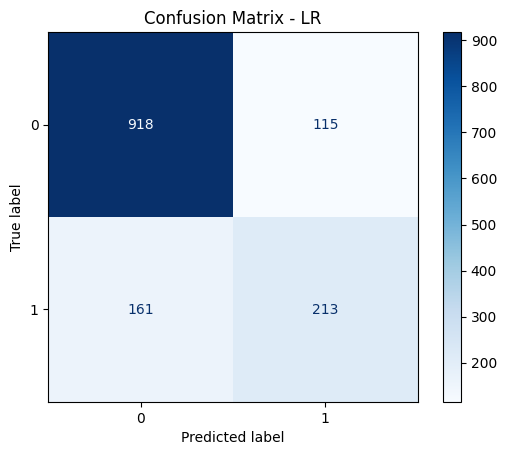

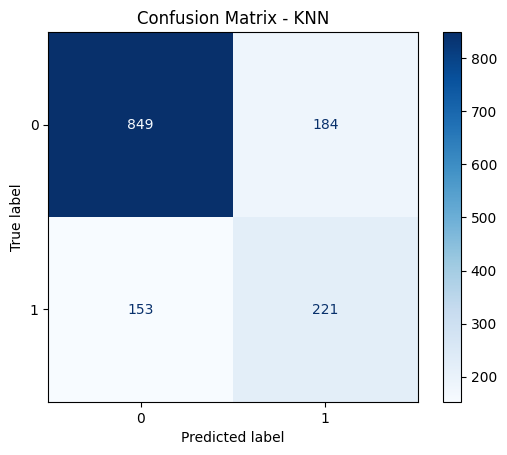

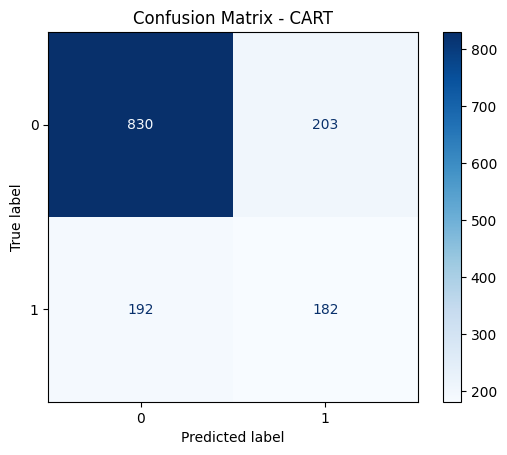

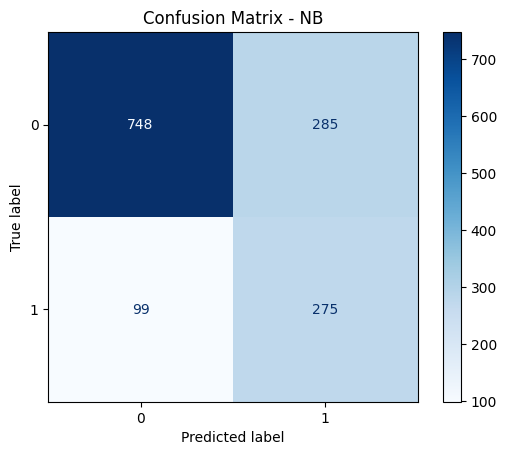

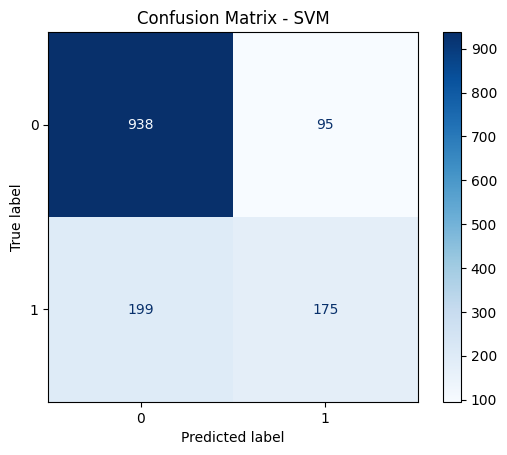

In [60]:
# ===============================
# CONFUSION MATRICES FOR MODELS
# ===============================

for name, model in models:
    
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train model
    pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = pipeline.predict(X_test)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


In [72]:
df.head()

,tenure,monthlycharges,totalcharges,churn,gender_Male,seniorcitizen_Yes,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,...,deviceprotection_Yes,techsupport_Yes,streamingtv_Yes,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,1,29.85,29.85,0,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,1889.50,0,True,False,False,False,True,False,...,True,False,False,False,True,False,False,False,False,True
2,2,53.85,108.15,1,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,1840.75,0,True,False,False,False,False,True,...,True,True,False,False,True,False,False,False,False,False
4,2,70.70,151.65,1,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [66]:
# 1️⃣ Identify categorical features from the full dataframe
cat_features = df.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_features)

# 2️⃣ Strip any extra spaces from column names (common issue)
df.columns = df.columns.str.strip()

# 3️⃣ Apply one-hot encoding on the dataframe
df_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)

# 4️⃣ Check
print(df_encoded.head())
print(df_encoded.dtypes)  # All should be numeric now


Categorical columns: Index([], dtype='object')
   tenure  monthlycharges  totalcharges  churn  gender_Male  \
0       1           29.85         29.85      0        False   
1      34           56.95       1889.50      0         True   
2       2           53.85        108.15      1         True   
3      45           42.30       1840.75      0         True   
4       2           70.70        151.65      1        False   

   seniorcitizen_Yes  partner_Yes  dependents_Yes  phoneservice_Yes  \
0              False         True           False             False   
1              False        False           False              True   
2              False        False           False              True   
3              False        False           False             False   
4              False        False           False              True   

   multiplelines_No phone service  ...  deviceprotection_Yes  techsupport_Yes  \
0                            True  ...                 False      

In [71]:
df.head()

,tenure,monthlycharges,totalcharges,churn,gender_Male,seniorcitizen_Yes,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,...,deviceprotection_Yes,techsupport_Yes,streamingtv_Yes,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,1,29.85,29.85,0,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,1889.50,0,True,False,False,False,True,False,...,True,False,False,False,True,False,False,False,False,True
2,2,53.85,108.15,1,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,1840.75,0,True,False,False,False,False,True,...,True,True,False,False,True,False,False,False,False,False
4,2,70.70,151.65,1,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


Categorical columns: Index([], dtype='object')
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.7974413646055437
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.65      0.51      0.57       374

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



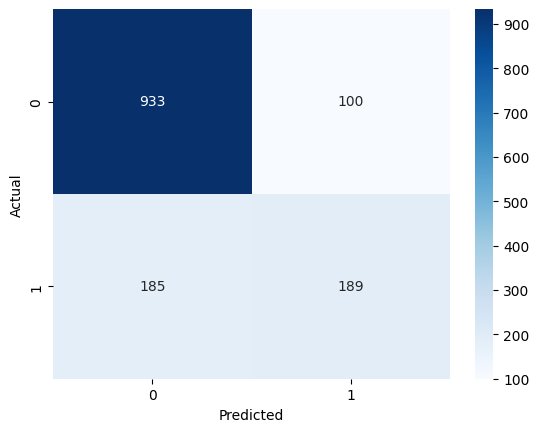

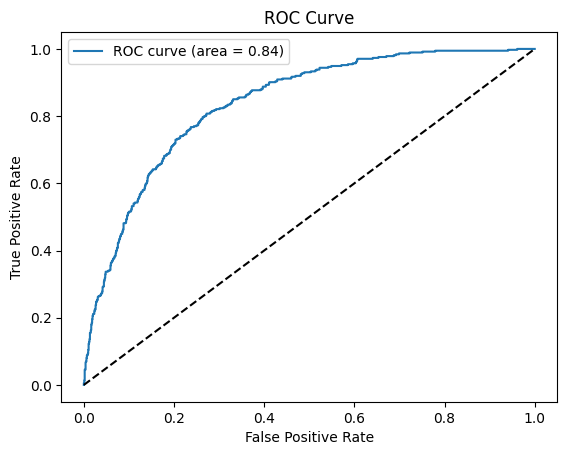

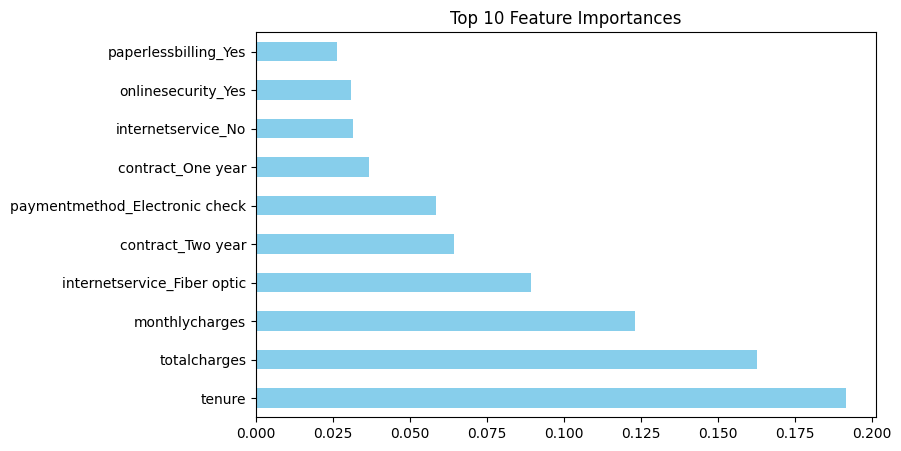

In [ ]:

# Strip column names to avoid KeyError
df.columns = df.columns.str.strip()

# -----------------------------
# 3. DATA PREPROCESSING
# -----------------------------
# Encode target variable if needed
if df['churn'].dtype == 'object':
    df['churn'] = df['churn'].map({'No':0, 'Yes':1})

# Identify categorical columns
cat_features = df.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_features)

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=cat_features, drop_first=True)

# -----------------------------
# 4. FEATURE AND TARGET SPLIT
# -----------------------------
X = df.drop('churn', axis=1)
y = df['churn']

# -----------------------------
# 5. SCALE NUMERIC FEATURES (optional)
# -----------------------------
num_features = X.select_dtypes(include=['int64','float64']).columns
scaler = StandardScaler()
X[num_features] = scaler.fit_transform(X[num_features])

# -----------------------------
# 6. TRAIN-TEST SPLIT
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 7. RANDOM FOREST MODEL & HYPERPARAMETER TUNING
# -----------------------------
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 300, 500],         # reduced for faster tuning
    'max_depth': [None,5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt','log2' ,None]      # 'auto' removed
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=2
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# -----------------------------
# 8. MODEL EVALUATION
# -----------------------------
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:,1]

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Curve
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# -----------------------------
# 9. FEATURE IMPORTANCE
# -----------------------------
feat_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(8,5), color='skyblue')
plt.title("Top 10 Feature Importances")
plt.show()


In [77]:
# -----------------------------
# PREDICTION BASED ON USER INPUT
# -----------------------------
import numpy as np

# Example: get feature names from trained model
feature_names = X.columns

# Create a dictionary to store user inputs
user_input = {}

# Loop through features and get input from user
for feature in feature_names:
    # Determine if feature is numeric or one-hot encoded
    if "_" in feature:  # one-hot column (categorical)
        user_input[feature] = int(input(f"Is {feature.replace('_',' ')}? (0/1): "))
    else:  # numeric column
        user_input[feature] = float(input(f"Enter value for {feature}: "))

# Convert to DataFrame
input_df = pd.DataFrame([user_input])

# Scale numeric features (same as training)
input_df[num_features] = scaler.transform(input_df[num_features])

# Predict using trained Random Forest
churn_pred = best_rf.predict(input_df)[0]
churn_prob = best_rf.predict_proba(input_df)[0][1]

# Output result
if churn_pred == 1:
    print(f"The customer is likely to CHURN. Probability: {churn_prob:.2f}")
else:
    print(f"The customer is likely to STAY. Probability: {churn_prob:.2f}")


Enter value for tenure:  1
Enter value for monthlycharges:  0
Enter value for totalcharges:  1
Is gender Male? (0/1):  1
Is seniorcitizen Yes? (0/1):  0
Is partner Yes? (0/1):  1
Is dependents Yes? (0/1):  0
Is phoneservice Yes? (0/1):  1
Is multiplelines No phone service? (0/1):  1
Is multiplelines Yes? (0/1):  1
Is internetservice Fiber optic? (0/1):  1
Is internetservice No? (0/1):  1
Is onlinesecurity Yes? (0/1):  1
Is onlinebackup Yes? (0/1):  0
Is deviceprotection Yes? (0/1):  1
Is techsupport Yes? (0/1):  0
Is streamingtv Yes? (0/1):  1
Is streamingmovies Yes? (0/1):  0
Is contract One year? (0/1):  1
Is contract Two year? (0/1):  0
Is paperlessbilling Yes? (0/1):  1
Is paymentmethod Credit card (automatic)? (0/1):  1
Is paymentmethod Electronic check? (0/1):  0
Is paymentmethod Mailed check? (0/1):  1


The customer is likely to STAY. Probability: 0.33
